# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 22:**  
Period = 3.7710993750    
tdepth = 0.0383664925**2
   
  - **Sector 48:**  
Period = 3.7711064915   
tdepth = 0.0377757049**2

In [2]:
ID = 148673433
sectors = np.array([22])

period = 3.7710993750
tdepth = 0.0383664925**2

lc = pd.read_csv("TOI_5704_22.csv", header=None)

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

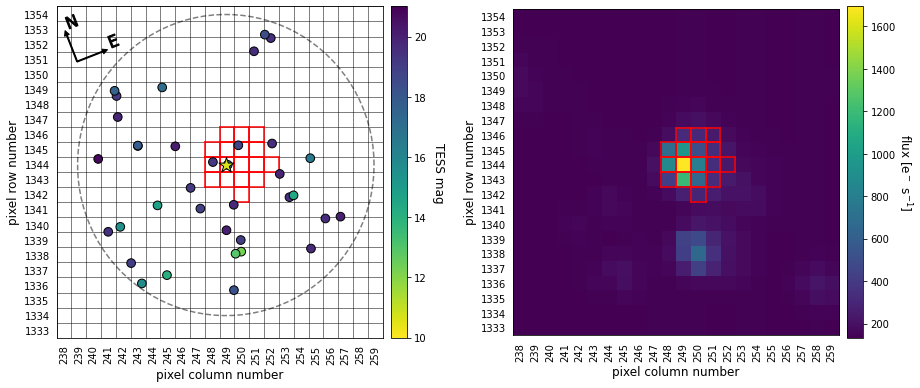

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,148673433,10.6147,9.718,9.159,9.021,169.824581,44.989146,0.730000,0.757521,4590.0,11.127300,0.000,0.000
1,900281091,16.0254,NaN,NaN,NaN,169.825561,44.988956,NaN,NaN,NaN,NaN,2.587,105.328
2,900281095,19.2717,NaN,NaN,NaN,169.818836,44.991958,NaN,NaN,NaN,0.492258,17.789,304.688
3,900281093,18.7712,NaN,NaN,NaN,169.834220,44.994441,NaN,NaN,NaN,0.776134,31.074,52.157
4,900281088,19.7906,NaN,NaN,NaN,169.821278,44.973997,NaN,NaN,NaN,1.603140,55.179,188.769
5,900281094,19.1765,NaN,NaN,NaN,169.803322,44.985850,NaN,NaN,NaN,0.376911,55.414,257.645
6,900281090,18.8763,NaN,NaN,NaN,169.804347,44.977189,NaN,NaN,5495.0,0.039353,67.137,230.129
7,148673432,19.5933,17.075,16.476,15.907,169.850976,44.990469,NaN,NaN,NaN,NaN,67.372,85.935
8,900281096,20.1419,NaN,NaN,NaN,169.803371,45.002644,NaN,NaN,NaN,NaN,72.643,311.995
9,900281092,19.9086,NaN,NaN,NaN,169.849224,44.978659,NaN,NaN,NaN,-0.040042,73.229,121.023


In [4]:
ap = np.array([[250, 1342], [248, 1343], [249, 1343], [250, 1343], 
               [251, 1343], [248, 1344], [249, 1344], [250, 1344], 
               [251, 1344], [252, 1344], [248, 1345], [249, 1345], 
               [250, 1345], [251, 1345], [249, 1346], [250, 1346], 
               [251, 1346]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,148673433,10.6147,9.718,9.159,9.021,169.824581,44.989146,0.730000,0.757521,4590.0,11.127300,0.000,0.000,9.920396e-01,0.001484
1,900281091,16.0254,NaN,NaN,NaN,169.825561,44.988956,NaN,NaN,NaN,NaN,2.587,105.328,6.883423e-03,0.213845
2,900281095,19.2717,NaN,NaN,NaN,169.818836,44.991958,NaN,NaN,NaN,0.492258,17.789,304.688,2.668577e-04,0.000000
3,900281093,18.7712,NaN,NaN,NaN,169.834220,44.994441,NaN,NaN,NaN,0.776134,31.074,52.157,5.297644e-04,0.000000
4,900281088,19.7906,NaN,NaN,NaN,169.821278,44.973997,NaN,NaN,NaN,1.603140,55.179,188.769,4.386752e-05,0.000000
5,900281094,19.1765,NaN,NaN,NaN,169.803322,44.985850,NaN,NaN,NaN,0.376911,55.414,257.645,1.871458e-05,0.000000
6,900281090,18.8763,NaN,NaN,NaN,169.804347,44.977189,NaN,NaN,5495.0,0.039353,67.137,230.129,5.255067e-06,0.000000
7,148673432,19.5933,17.075,16.476,15.907,169.850976,44.990469,NaN,NaN,NaN,NaN,67.372,85.935,7.390118e-05,0.000000
8,900281096,20.1419,NaN,NaN,NaN,169.803371,45.002644,NaN,NaN,NaN,NaN,72.643,311.995,4.214925e-07,0.000000
9,900281092,19.9086,NaN,NaN,NaN,169.849224,44.978659,NaN,NaN,NaN,-0.040042,73.229,121.023,4.298648e-05,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

900281091


# Calculating FPP & NFPP

In [7]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 148673433.
Calculating EB and EBx2P scenario probabilities for 148673433.
Calculating PTP scenario probability for 148673433.
Calculating PEB and PEBx2P scenario probabilities for 148673433.
Calculating STP scenario probability for 148673433.
Calculating SEB and SEBx2P scenario probabilities for 148673433.
Calculating DTP scenario probability for 148673433.
Calculating DEB and DEBx2P scenario probabilities for 148673433.
Calculating BTP scenario probability for 148673433.
Calculating BEB and BEBx2P scenario probabilities for 148673433.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 900281091.
Wall time: 35min 13s


In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.012547154319234921
NFPP =  0.001777614430232194


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,148673433,TP,0.730000,0.757521,3.771099,87.176391,0.697260,0.391433,224.629296,3.363321,0.000000,0.000000,7.675935e-01
1,148673433,EB,0.730000,0.757521,3.771099,87.228284,0.215953,0.813223,182.649031,0.000000,0.108313,0.131627,5.379531e-07
2,148673433,EBx2P,0.730000,0.757521,7.542199,87.231455,0.681394,0.665947,183.812252,0.000000,0.728000,0.757521,7.594926e-07
3,148673433,PTP,0.730000,0.757521,3.771099,86.298891,0.898091,0.776459,237.394704,3.128620,0.000000,0.000000,1.236118e-01
4,148673433,PEB,0.730000,0.757521,3.771099,85.664938,0.754244,0.269539,135.309590,0.000000,0.130053,0.159220,3.523319e-25
5,148673433,PEBx2P,0.730000,0.757521,7.542199,86.642407,1.376889,0.481006,205.777784,0.000000,0.721026,0.752334,2.159927e-15
6,148673433,STP,0.636471,0.656894,3.771099,89.376608,0.148689,0.024136,281.728587,4.881093,0.000000,0.000000,7.494709e-03
7,148673433,SEB,0.100973,0.121394,3.771099,89.940423,0.011491,0.846155,174.327916,0.000000,0.025531,0.100000,7.379972e-06
8,148673433,SEBx2P,0.133734,0.163536,7.542199,89.300643,0.368762,0.645779,159.465175,0.000000,0.131219,0.160597,3.131363e-07
9,148673433,DTP,0.730000,0.757521,3.771099,87.209856,0.592122,0.416382,205.071865,3.497173,0.000000,0.000000,9.624756e-02


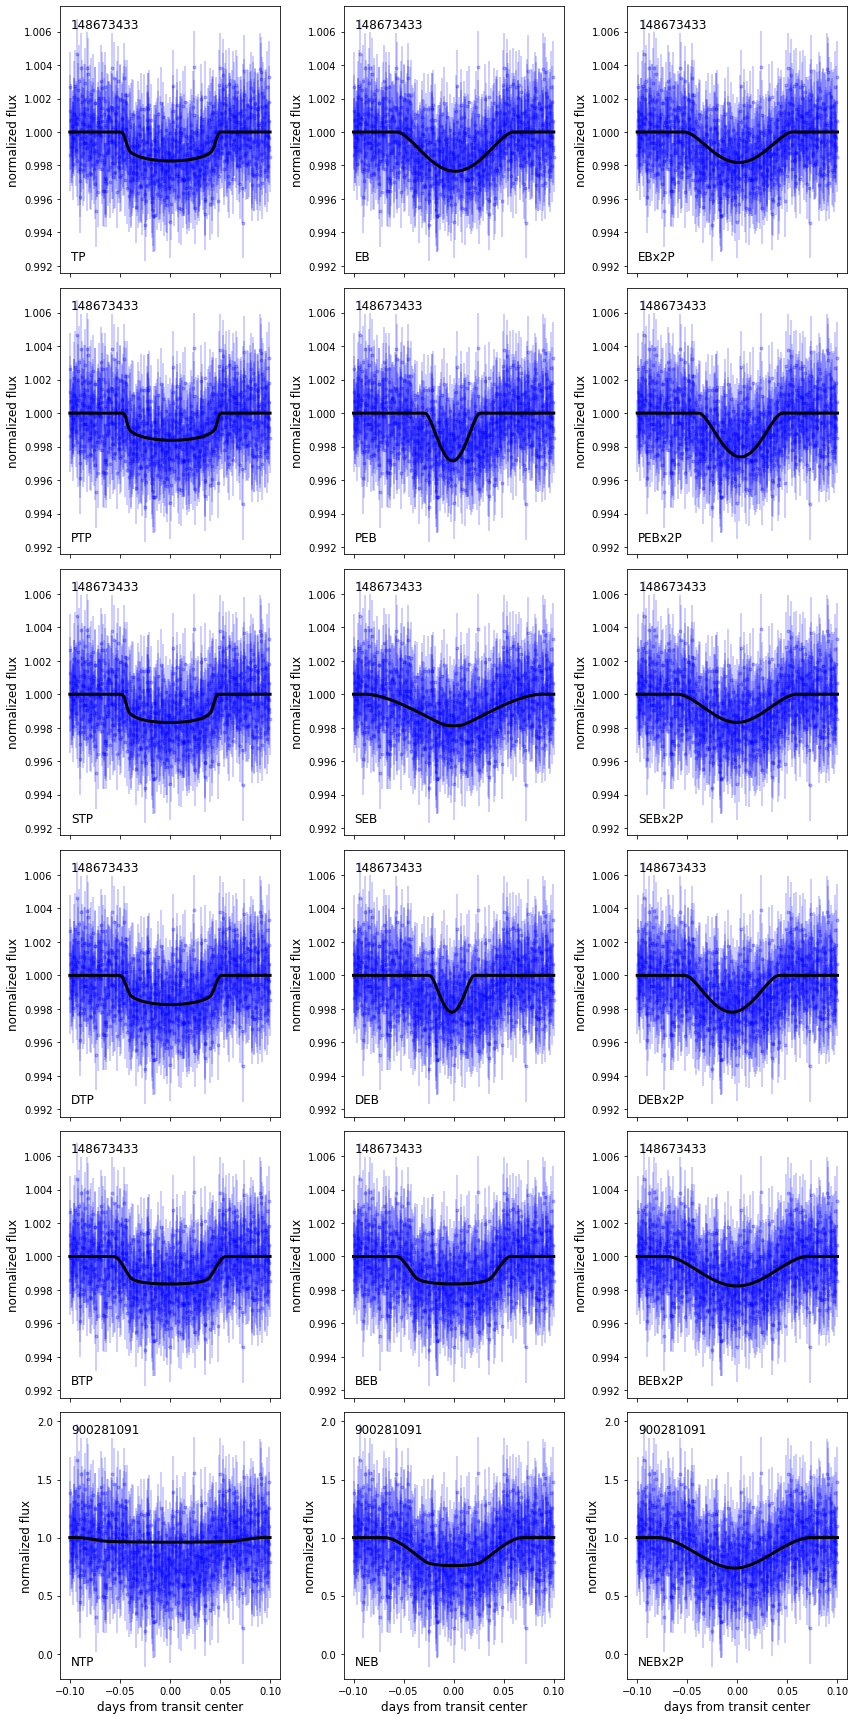

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))